In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [7]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [8]:
# variablat kategorike jane:
# sex, smoker, region
df['sex'] = df['sex'].astype('category')

In [9]:
d = dict(enumerate(df['sex'].cat.categories))
d

{0: 'female', 1: 'male'}

In [10]:
df['sex'] = df['sex'].cat.codes
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1337, dtype: int8

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int8   
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), int8(1), object(2)
memory usage: 74.4+ KB


In [13]:
df['region'] = df['region'].astype('category')
d = dict(enumerate(df['region'].cat.categories))
d

{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

In [14]:
df['region'] = df['region'].cat.codes

In [15]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int8   
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int8   
 5   region    1337 non-null   int8   
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 56.1 KB


In [17]:
# ndertoj variablat e vecuara
X = df.drop(columns = 'charges') # variablat e pavarura
y = df['charges'] #  variabli i varur

In [18]:
# ndajme filen te test dhe train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [19]:
# ndertoj modelin
from sklearn.linear_model import LinearRegression
multilinear_modl = LinearRegression()
multilinear_modl.fit(X_train, y_train)

LinearRegression()

In [20]:
y_predct_train = multilinear_modl.predict(X_train)

Text(0, 0.5, 'predict data')

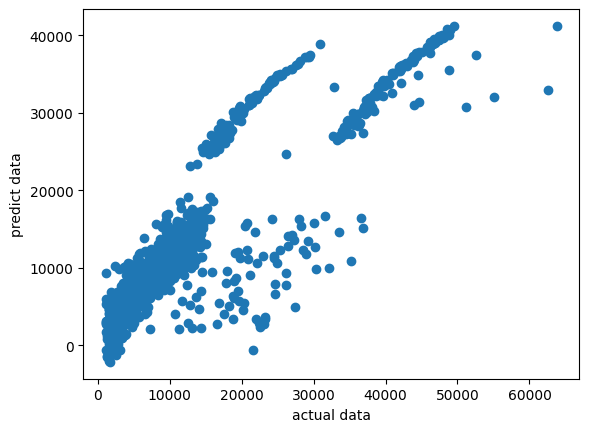

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_predct_train)
plt.xlabel("actual data")
plt.ylabel('predict data')

In [22]:
from sklearn.metrics import r2_score
r2_sc = r2_score(y_train, y_predct_train)
r2_sc

0.7633819996181807

In [23]:
# bej te njejten gje per test data
y_predc_test = multilinear_modl.predict(X_test)

Text(0, 0.5, 'prdict')

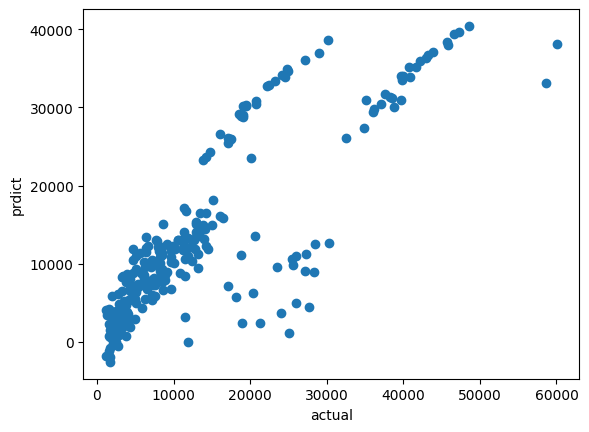

In [24]:
plt.scatter (y_test, y_predc_test)
plt.xlabel("actual")
plt.ylabel("prdict")

In [25]:
r2_sc = r2_score(y_test, y_predc_test)
r2_sc

0.6980257045399786

<Axes: xlabel='charges'>

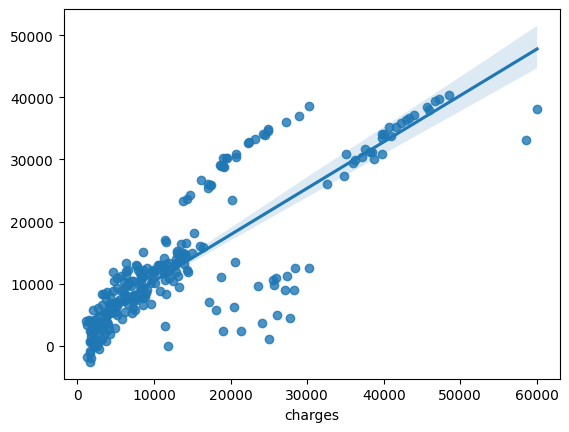

In [26]:
import seaborn as sns
sns.regplot(x=y_test, y=y_predc_test)